# **From Kaggle**

# About Dataset
# Overview
  This dataset provides a comprehensive view of customer interactions with digital marketing campaigns. It includes demographic data, marketing-specific metrics, customer engagement indicators, and historical purchase data, making it suitable for predictive modeling and analytics in the digital marketing domain.

Features:
* Demographic Information
* CustomerID: Unique identifier for each customer.
* Age: Age of the customer.
* Gender: Gender of the customer (Male/Female).
* Income: Annual income of the customer in USD.

Marketing-specific Variables
* CampaignChannel: The channel through which the marketing campaign is delivered (Email, Social Media, SEO, PPC, Referral).
* CampaignType: Type of the marketing campaign (Awareness, Consideration, Conversion, Retention).
* AdSpend: Amount spent on the marketing campaign in USD.
* ClickThroughRate: Rate at which customers click on the marketing content.
* ConversionRate: Rate at which clicks convert to desired actions (e.g., purchases).
* AdvertisingPlatform: Confidential.
* AdvertisingTool: Confidential.

Customer Engagement Variables
* WebsiteVisits: Number of visits to the website.
* PagesPerVisit: Average number of pages visited per session.
* TimeOnSite: Average time spent on the website per visit (in minutes).
* SocialShares: Number of times the marketing content was shared on social media.
* EmailOpens: Number of times marketing emails were opened.
* EmailClicks: Number of times links in marketing emails were clicked.
Historical Data
* PreviousPurchases: Number of previous purchases made by the customer.
* LoyaltyPoints: Number of loyalty points accumulated by the customer.
* Conversion: Binary variable indicating whether the customer converted (1) or not (0).

Potential Applications
Predictive modeling of customer conversion rates.
Analyzing the effectiveness of different marketing channels and campaign types.
Identifying key factors driving customer engagement and conversion.
Optimizing ad spend and campaign strategies to improve ROI.

# **Load Data & Preprocessing**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import TargetEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/digital_marketing_campaign_dataset.csv')

df.info()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurc

In [3]:
df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


In [4]:
df.drop(columns = ['CustomerID', 'AdvertisingPlatform', 'AdvertisingTool'], inplace = True)

These columns are not Necessary in creating our model

# **Exploratory Analysis**

In [5]:
df.describe()

,Age,Income,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,43.625500,84664.196750,5000.944830,0.154829,0.104389,24.751625,5.549299,7.727718,49.799750,9.476875,4.467375,4.485500,2490.268500,0.876500
std,14.902785,37580.387945,2838.038153,0.084007,0.054878,14.312269,2.607358,4.228218,28.901165,5.711111,2.856564,2.888093,1429.527162,0.329031
min,18.000000,20014.000000,100.054813,0.010005,0.010018,0.000000,1.000428,0.501669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,51744.500000,2523.221165,0.082635,0.056410,13.000000,3.302479,4.068340,25.000000,5.000000,2.000000,2.000000,1254.750000,1.000000
50%,43.000000,84926.500000,5013.440044,0.154505,0.104046,25.000000,5.534257,7.682956,50.000000,9.000000,4.000000,4.000000,2497.000000,1.000000
75%,56.000000,116815.750000,7407.989369,0.228207,0.152077,37.000000,7.835756,11.481468,75.000000,14.000000,7.000000,7.000000,3702.250000,1.000000
max,69.000000,149986.000000,9997.914781,0.299968,0.199995,49.000000,9.999055,14.995311,99.000000,19.000000,9.000000,9.000000,4999.000000,1.000000


No outliers spotted when comparing percentiles to min/max

Text(0.5, 1.0, 'Conversion Count')

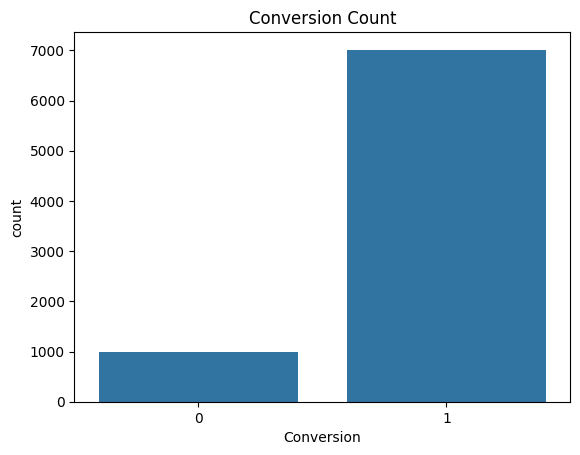

In [6]:
sns.countplot(data=df, x='Conversion')
plt.title("Conversion Count")

This graph is to see the distribution between converted and non converted users, and after seening the results there is an imbalance for our target.

The next few graphs shown will be done primarily to gain insight on some of the categorical features since

Text(0.5, 1.0, 'Conversion Count per Gender')

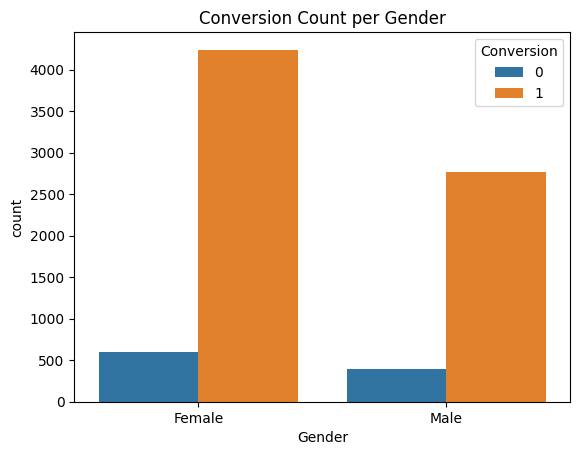

In [7]:
sns.countplot(data=df, x='Gender', hue='Conversion')
plt.title("Conversion Count per Gender")

There is a notable difference between the gender of the customers and could possibly be due to other categorical features such as CampaignType & CampaignChannel

Text(0.5, 1.0, 'Gender Count per Campaign Type')

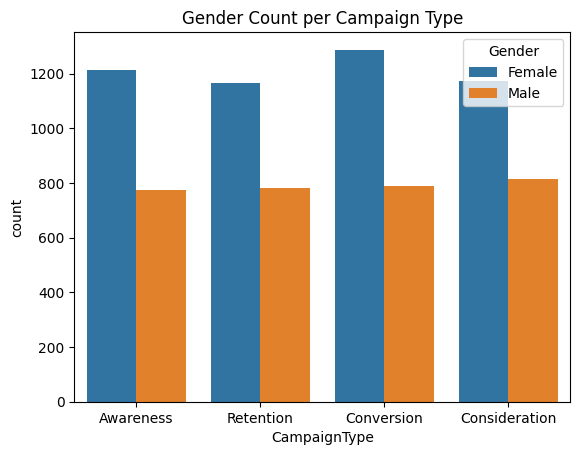

In [8]:
sns.countplot(data=df, x='CampaignType', hue='Gender')
plt.title("Gender Count per Campaign Type")

Conversion campaign types have the highest amount of users converted to customers

Text(0.5, 1.0, 'Campaign Channel & Gender Count')

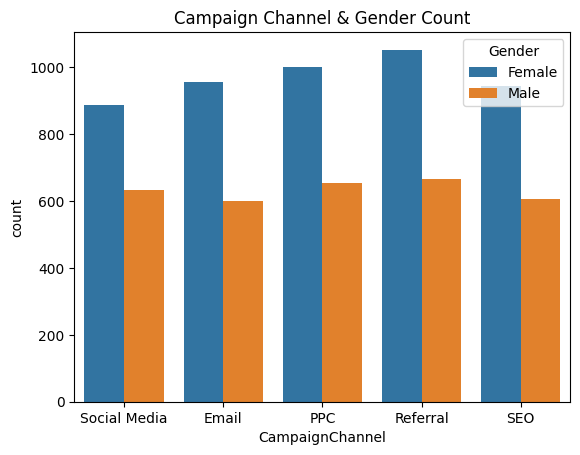

In [9]:
sns.countplot(data=df, x='CampaignChannel', hue='Gender')
plt.title("Campaign Channel & Gender Count")

This is a graph showing how many of each gender interacted with a campaign on each channel. Still both graphs indicate that Females are more likely to convert.

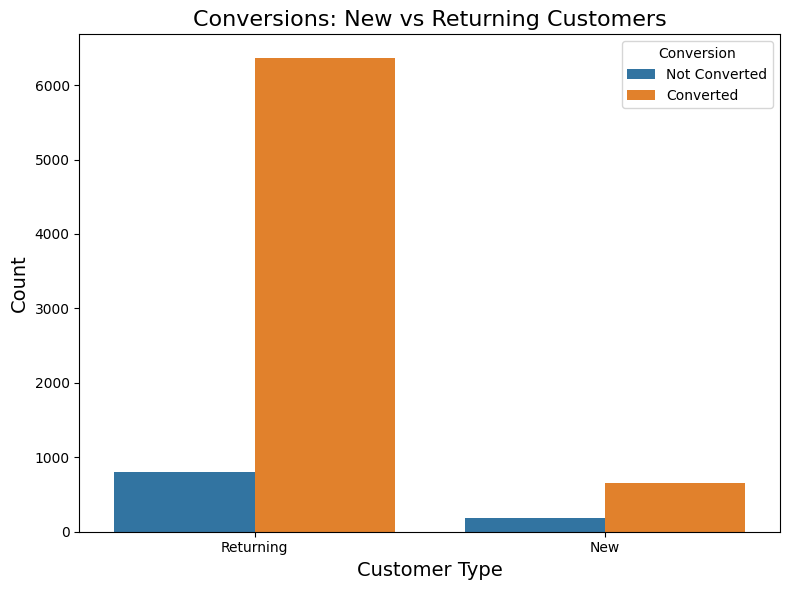

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x=df['PreviousPurchases'].apply(lambda x: 'New' if x == 0 else 'Returning'), hue='Conversion')

plt.title("Conversions: New vs Returning Customers", fontsize=16)
plt.xlabel("Customer Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.legend(title="Conversion", labels=["Not Converted", "Converted"])
plt.tight_layout()
plt.show()

A case can be made here about what the target audience or goal of these marketing campaigns are. Most of the instances where users converted were returning customers.

# **Numerical Feature's Correlation Matrix to Target (Conversion)**

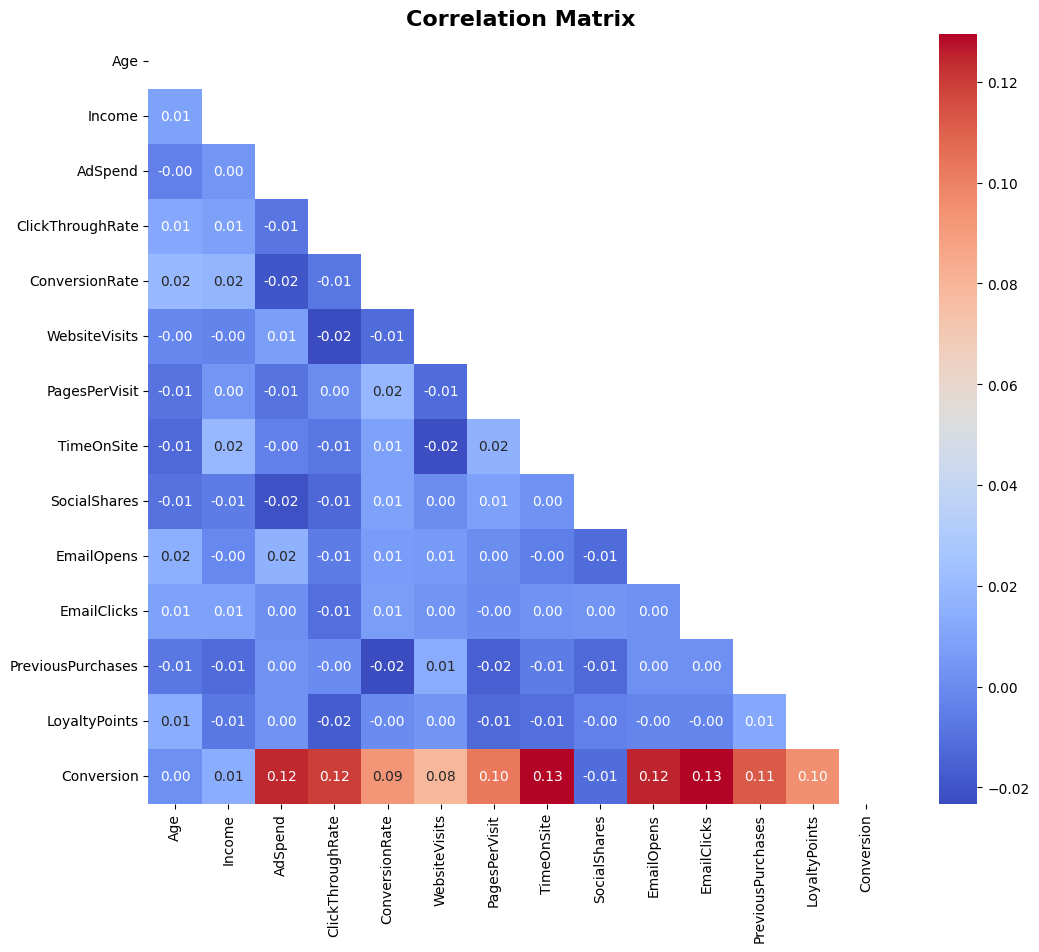

In [11]:
plt.figure(figsize=(12, 10))

corr_matrix = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.show()

<ipython-input-12-1c58ecb26767>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y = filtered_corr.index, x = filtered_corr.values, palette = 'coolwarm')


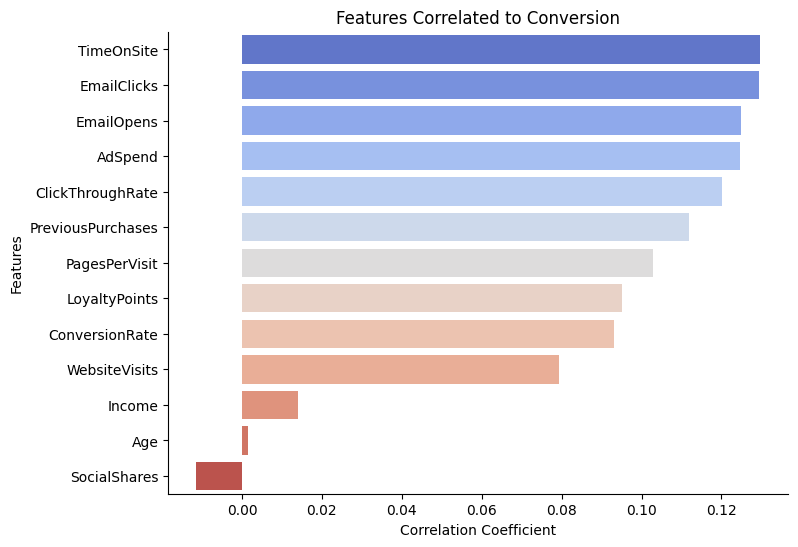

TimeOnSite           0.129609
EmailClicks          0.129521
EmailOpens           0.124884
AdSpend              0.124672
ClickThroughRate     0.120012
PreviousPurchases    0.111781
PagesPerVisit        0.102840
LoyaltyPoints        0.095004
ConversionRate       0.093185
WebsiteVisits        0.079339
Income               0.013974
Age                  0.001606
SocialShares        -0.011449
Name: Conversion, dtype: float64


In [12]:
filtered_corr = corr_matrix['Conversion'].drop(['Conversion']).sort_values (ascending = False)

plt.figure(figsize = (8,6))
sns.barplot(y = filtered_corr.index, x = filtered_corr.values, palette = 'coolwarm')
plt.title('Features Correlated to Conversion')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')

sns.despine()
plt.show()

print(filtered_corr)

From what's gathered, most of these numerical features and their correlation to our target, isnt high however the lack of a higher correlation coefficients for each feature can serve as a insight as why these features don't serve as a big of a correlation as we want it to. It's possible that the dataset's categorical features has higher correlation features that these numerical ones, something that could be gathered in the future, but for now the models used will have only training data that consists of just discrete and continuous features.

It's also important to note in the second graph that most of the values for our target were actually converted, about 87.65% of the 8000 instances.

# **Visualization of Top 5 Correlated features**

# Analysis for TimeOnSite

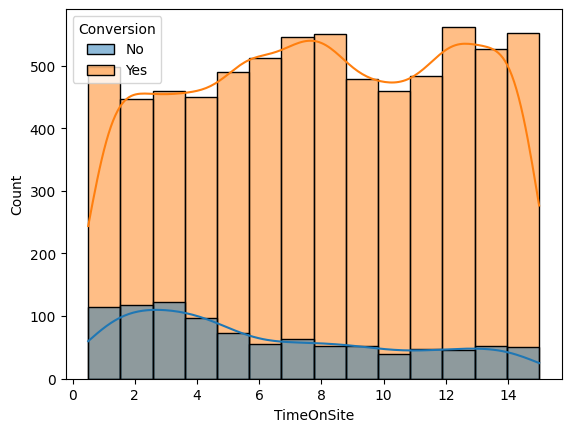

In [13]:
plot = sns.histplot(data = df, x = 'TimeOnSite', hue = 'Conversion', kde = True, bins = 14, color = 'blue')

plot.legend_.texts[0].set_text('No')
plot.legend_.texts[1].set_text('Yes')

This is time spent on the website that the campaign leads to, having a higher time on the website has contributed to users converting to customers. This could always be optimized by figuring out which features contribute to having these users click on the campaign. There isn't anything concrete enough to state that the amount of time users spend on the website has contributed to more users converting. However there is evidence that shows that the less time spent the website contributes to more users not converting.

# Analysis for Email related Campaigns

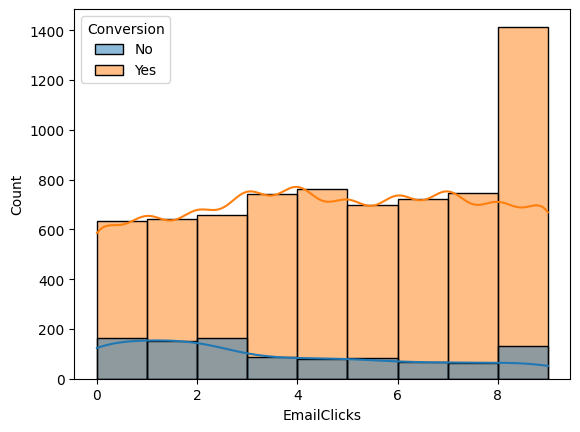

In [14]:
plot = sns.histplot(data = df, x = 'EmailClicks', hue = 'Conversion', kde = True, bins = 9, color = 'blue')

plot.legend_.texts[0].set_text('No')
plot.legend_.texts[1].set_text('Yes')

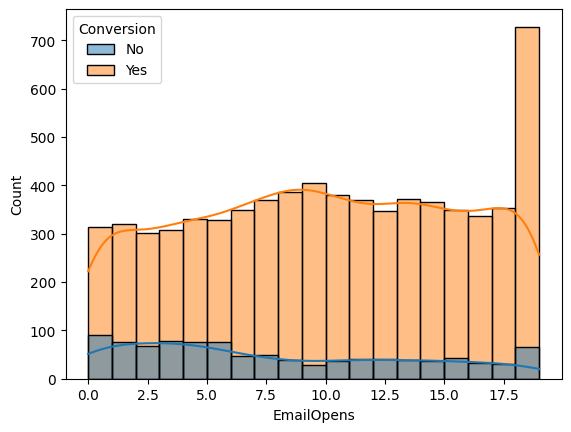

In [15]:
plot = sns.histplot(data = df, x = 'EmailOpens', hue = 'Conversion', kde = True, bins = 19, color = 'blue')

plot.legend_.texts[0].set_text('No')
plot.legend_.texts[1].set_text('Yes')

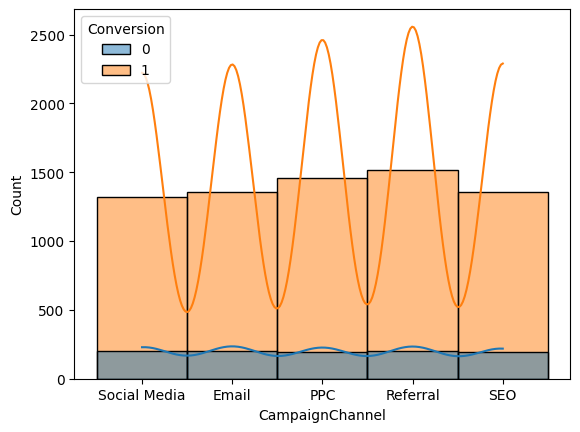

In [16]:
plot = sns.histplot(data = df, x = 'CampaignChannel', hue = 'Conversion', kde = True, bins = 19, color = 'blue')

In [17]:
df[['EmailOpens', 'EmailClicks', 'SocialShares']].sum()

,0
EmailOpens,75815
EmailClicks,35739
SocialShares,398398


The three graphs above could possibly explain why the numerical features related to **Email** marketing campaigns correlate more to our target than other features related to Social Media campaigns which actually has a negative correlation to our target.

What We know:
*   There are more campaigns where emails served as the primary marketing campaign than other channels
*   The numerical features that track how many emails where clicked and opened aren't unique to instances where Emails were the primary Campaign Channel. Meaning that other instances of campaign channels could gather email clicks and opens.
*Although Social Media were used less than emails as a primary campaign channel, the volume of social shares are high possibly due to the amount of users on social media.

Possible Insight:



*   It's possible that the large number of social shares could be due to large amounts of users on social media, despite that when compared to email clicks and opens they have a lower correlation to our target when looking at a few graphs above. This could be due to the fact that users aren't as serious of a buyer when looking at social media because that's all that they're doing just looking not buying. Where as if we have an email set as our primary campaign channel, its possible that customers are more serious in buying what's being advertised.



  


# Analysis for Adspend

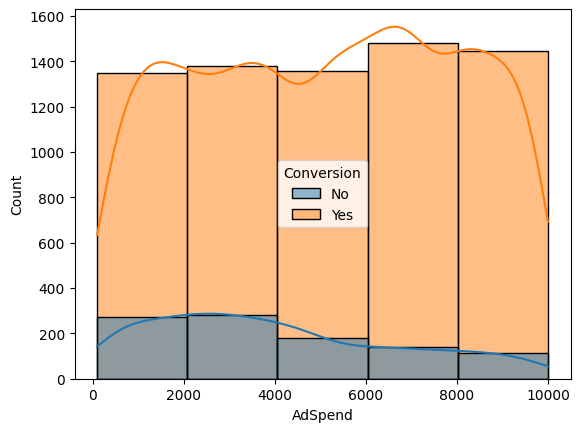

In [18]:
plot = sns.histplot(data = df, x = 'AdSpend', hue = 'Conversion', kde = True, bins = 5, color = 'blue')

plot.legend_.texts[0].set_text('No')
plot.legend_.texts[1].set_text('Yes')

The adspend represents how much money was put into the campaign. As we can see there is a notable trend that suggest less adspend correlates to more users not converting. From the dataset, it seems that the spot for getting the most amount of users converted would be between spending 6,000 - 8,000. Knowing this we could have insights as to how much a campaign costs based off other categorical features.

In [19]:
bins = [0, 2000, 4000, 6000, 8000, 10000]
labels = ['0-2000', '2000-4000', '4000-6000', '6000-8000', '8000-10000']
df['AdSpendBin'] = pd.cut(df['AdSpend'], bins=bins, labels=labels, include_lowest=True)
binned_counts = df.groupby(['CampaignChannel', 'CampaignType', 'AdSpendBin']).size().unstack(fill_value=0)
binned_counts = binned_counts.sort_index()

binned_counts

<ipython-input-19-80a6d4bcbf30>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_counts = df.groupby(['CampaignChannel', 'CampaignType', 'AdSpendBin']).size().unstack(fill_value=0)


AdSpendBin                     0-2000  2000-4000  4000-6000  6000-8000  \
CampaignChannel CampaignType                                             
Email           Awareness          65         92         87         71   
                Consideration      74         93         76         88   
                Conversion         72         96         74         81   
                Retention          59         74         78         73   
PPC             Awareness          75         91         81         87   
                Consideration      80         86         74         79   
                Conversion        109         88         69         94   
                Retention          69         85         85         75   
Referral        Awareness          81         82         85         96   
                Consideration      85         72         91         78   
                Conversion         85         92         89         95   
                Retention          81         99         89         75   
SEO             Awareness          65         89         79         74   
                Consideration      76         81         66         66   
                Conversion         88         77         70         92   
                Retention          84         76         70         84   
Social Media    Awareness          66         78         75         76   
                Consideration      73        100         77         83   
                Conversion         83         69         73         82   
                Retention          75         79         66         85   

AdSpendBin                     8000-10000  
CampaignChannel CampaignType               
Email           Awareness              63  
                Consideration          72  
                Conversion             93  
                Retention              76  
PPC             Awareness              78  
                Consideration          85  
                Conversion             87  
                Retention              78  
Referral        Awareness              87  
                Consideration          81  
                Conversion             84  
                Retention              92  
SEO             Awareness              83  
                Consideration          80  
                Conversion             75  
                Retention              75  
Social Media    Awareness              82  
                Consideration          72  
                Conversion             60  
                Retention              65

With this we're able to roughly see how much campaigns cost and stakeholders can decide what campaigns cost between 6000 - 8000 so that they're able to convert more users to customers

In [20]:
#Will Drope AdSpendBin as its not a part of our origianl Data along with SocialShares & Age since they have little to no correlation to our Target
df.drop(columns = ['AdSpendBin'], inplace = True)

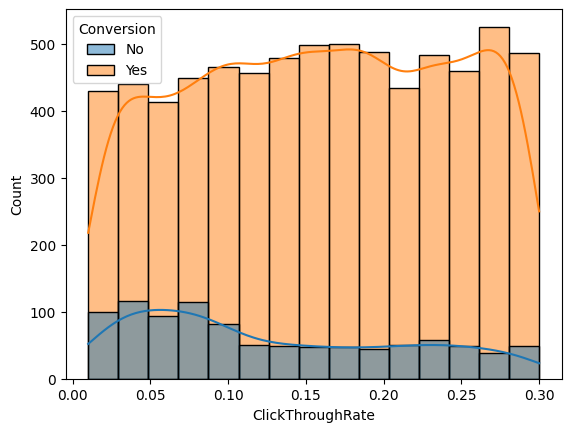

In [21]:
plot = sns.histplot(data = df, x = 'ClickThroughRate', hue = 'Conversion', kde = True, bins = 15, color = 'blue')

plot.legend_.texts[0].set_text('No')
plot.legend_.texts[1].set_text('Yes')

There isn't much of a correlation between ClickThroughRate & Conversion because it seems as if regardless if the ClickThroughRate is high the ConversionRate isn't necessarily going up and that could be said for the rest of these features.

# Splitting Data into Training & Testing Sets

In [22]:
#Will be used on an additional encoder
df2 = df.copy()

In [23]:
def classification_model_evaluation(X, y, score='accuracy'):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import roc_curve, roc_auc_score

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

    # Define models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(max_depth=4, min_samples_leaf=5),
        'Neural Network': MLPClassifier(max_iter=1000),
        'Naive Bayes': GaussianNB(),
        'KNN': KNeighborsClassifier()
    }

    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
    results = []
    roc_data = []
    summary = []

    for name, model in models.items():
        cv_scores = cross_val_score(model, X_train, y_train, cv=skf, scoring=score)
        mean_score = np.mean(cv_scores)
        std_score = np.std(cv_scores)

        model.fit(X_train, y_train)
        try:
            y_proba = model.predict_proba(X_test)[:, 1]
        except:
            y_proba = model.decision_function(X_test)

        fpr, tpr, _ = roc_curve(y_test, y_proba)
        auc_score = roc_auc_score(y_test, y_proba)

        results.append(cv_scores)
        roc_data.append((fpr, tpr, auc_score))
        summary.append({
            'Model': name,
            'Mean CV Score': round(mean_score, 4),
            'Std Dev': round(std_score, 4),
            'AUC Score': round(auc_score, 4)
        })

    # Setup subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Boxplot for cross-validation results
    axes[0].boxplot(results, labels=[m['Model'] for m in summary], patch_artist=True, showmeans=True)
    axes[0].set_title('Cross-Validation Score Comparison')
    axes[0].set_xlabel('Model')
    axes[0].set_ylabel(score.capitalize())
    axes[0].grid(True)

    # ROC curve plot
    for i, (fpr, tpr, auc_score) in enumerate(roc_data):
        label = f"{summary[i]['Model']} (AUC = {auc_score:.3f})"
        axes[1].plot(fpr, tpr, label=label)
    axes[1].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes[1].set_title("ROC Curve Comparison")
    axes[1].set_xlabel("False Positive Rate")
    axes[1].set_ylabel("True Positive Rate")
    axes[1].legend(loc='lower right')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

    # Display summary
    summary_df = pd.DataFrame(summary)
    print("📊 Model Evaluation Summary:\n")
    print(summary_df)

In [24]:
X = df.drop(columns = ['Conversion'])
y = df['Conversion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5600, 16), (2400, 16), (5600,), (2400,))

# Data Scaling

In [25]:
scaler = StandardScaler()
columns_to_scale = ['Income', 'AdSpend', 'WebsiteVisits', 'PagesPerVisit',
            'TimeOnSite', 'EmailOpens', 'EmailClicks',
            'PreviousPurchases', 'LoyaltyPoints', 'Age', 'SocialShares']
columns_to_passthrough = ['ClickThroughRate', 'ConversionRate']

#Will only apply StandardScaler to the selected columns to Scale. Will not scale Conversion or ClickThroughRates
preprocessor = ColumnTransformer([('num', scaler, columns_to_scale)], remainder='passthrough')

X_train = X_train[columns_to_scale + columns_to_passthrough]
X_test = X_test[columns_to_scale + columns_to_passthrough]

preprocessor.fit(X_train)

X_train_scaled = preprocessor.transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

scaled_feature_names = preprocessor.get_feature_names_out()
#Creating dataframes of scaled training and test to later fit into updated training & test sets with encoded data
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = scaled_feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = scaled_feature_names)
X_test_scaled_df.head()

,num__Income,num__AdSpend,num__WebsiteVisits,num__PagesPerVisit,num__TimeOnSite,num__EmailOpens,num__EmailClicks,num__PreviousPurchases,num__LoyaltyPoints,num__Age,num__SocialShares,remainder__ClickThroughRate,remainder__ConversionRate
0,-0.558637,-1.165186,-0.046581,-0.134096,0.781688,0.442203,-0.867155,1.567356,0.711661,-0.305617,-1.427672,0.151439,0.183833
1,1.517626,0.968967,1.634097,1.449792,0.876218,-0.957649,1.224925,0.523363,-0.628480,-0.037899,0.644681,0.095874,0.029717
2,-1.663156,-1.138762,1.564068,-0.932262,0.457251,1.667073,-1.215835,0.871361,-0.546388,-0.506406,0.368367,0.128542,0.113779
3,0.953585,1.459791,-0.956949,-1.672352,1.050823,0.967148,0.178885,-0.172632,0.933381,0.162890,-0.046104,0.079658,0.189410
4,-0.380175,0.614304,0.933814,0.772301,1.362234,-1.307612,0.527565,-0.172632,-0.356242,0.631397,1.439082,0.095194,0.083329


We are only going to scale the numerical features that have high variance, which means we are excluding features like ConversionRate & ClickThroughRate since those values are already between 0-1.

# Model Testing **(Only Numerical Columns)**

In [26]:
X_train_scaled

array([[-1.18006906, -1.32492763,  0.09347521, ...,  0.05751396,
         0.14034717,  0.18653874],
       [ 0.60894925, -0.98729669,  0.44361647, ...,  0.54106292,
         0.01005221,  0.13269238],
       [-0.82029285, -1.39315856,  0.93381423, ...,  0.43744529,
         0.15206617,  0.10222495],
       ...,
       [-1.35410617, -0.68368522, -1.30708982, ..., -1.66944664,
         0.2197095 ,  0.01347841],
       [ 0.31413374,  0.83722037,  0.51364472, ...,  0.92099425,
         0.09625331,  0.17439686],
       [ 0.52727522,  0.55168701, -0.88692031, ..., -0.04610368,
         0.27910478,  0.15412187]])

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

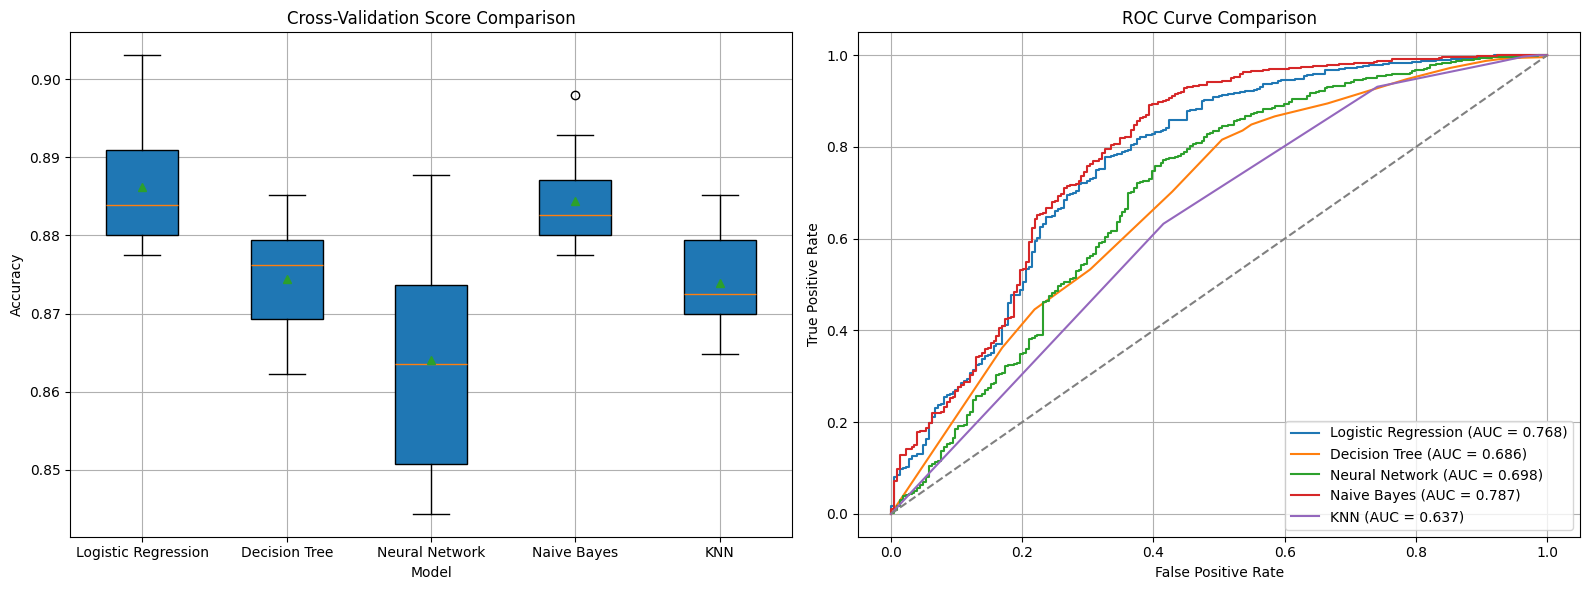

📊 Model Evaluation Summary:

                 Model  Mean CV Score  Std Dev  AUC Score
0  Logistic Regression         0.8862   0.0084     0.7683
1        Decision Tree         0.8745   0.0076     0.6865
2       Neural Network         0.8640   0.0147     0.6982
3          Naive Bayes         0.8844   0.0064     0.7874
4                  KNN         0.8740   0.0062     0.6370


In [27]:
classification_model_evaluation(X_train_scaled, y_train, score = 'accuracy')

# Model Testing **(One Hot Encoder)**

In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [29]:
categorical_columns = ['CampaignChannel', 'CampaignType', 'Gender']

In [30]:
encoded_features = encoder.fit_transform(df.loc[X_train.index, categorical_columns])

feature_names = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded_features.toarray(), columns=feature_names, index=X_train.index)
feature_names

array(['CampaignChannel_Email', 'CampaignChannel_PPC',
       'CampaignChannel_Referral', 'CampaignChannel_SEO',
       'CampaignChannel_Social Media', 'CampaignType_Awareness',
       'CampaignType_Consideration', 'CampaignType_Conversion',
       'CampaignType_Retention', 'Gender_Female', 'Gender_Male'],
      dtype=object)

In [31]:
encoded_df.index = X_train_scaled_df.index

In [32]:
X_train_scaled_ohe = pd.concat([X_train_scaled_df, encoded_df], axis=1)
encoded_test = encoder.transform(df.loc[X_test.index, categorical_columns])
encoded_test_df = pd.DataFrame(encoded_test.toarray(), columns=feature_names, index=X_test.index)
X_test_scaled_ohe = pd.concat([X_test_scaled_df, encoded_test_df], axis=1)

In [33]:
X_train_scaled_ohe.index = y_train.index

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

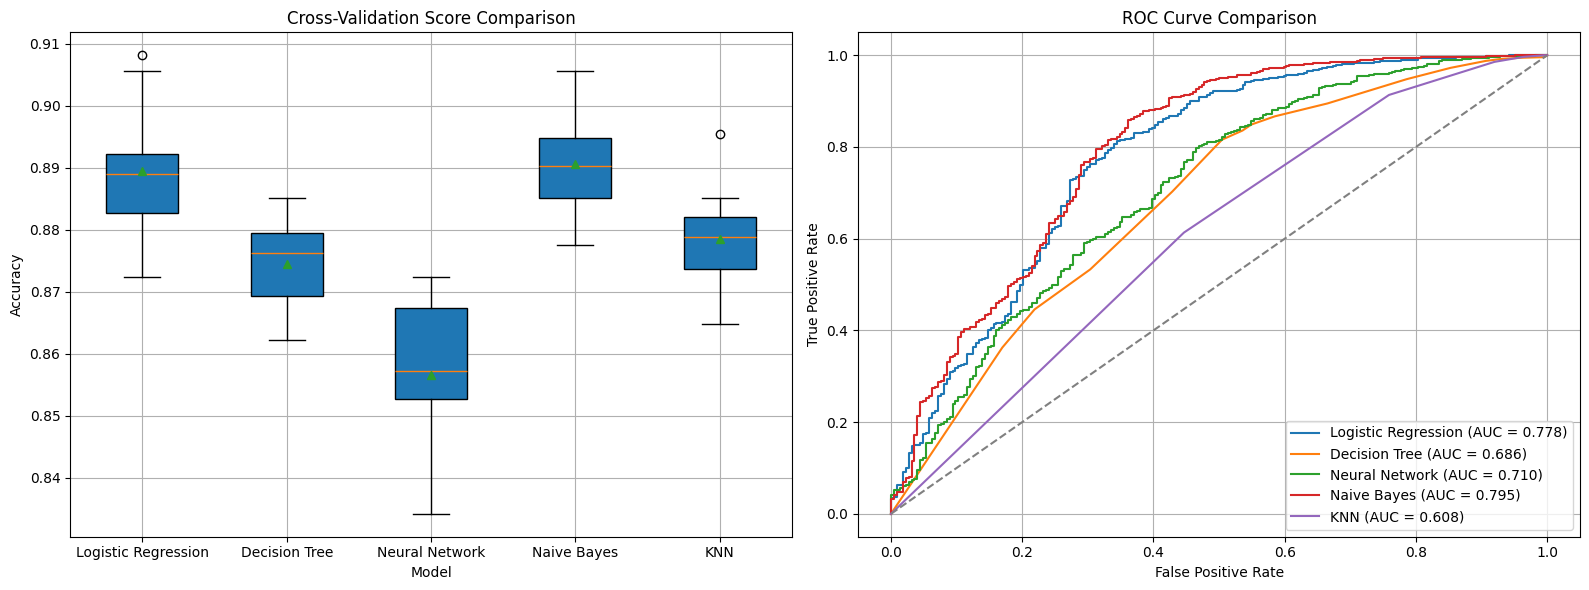

📊 Model Evaluation Summary:

                 Model  Mean CV Score  Std Dev  AUC Score
0  Logistic Regression         0.8895   0.0103     0.7784
1        Decision Tree         0.8745   0.0076     0.6865
2       Neural Network         0.8566   0.0130     0.7104
3          Naive Bayes         0.8906   0.0086     0.7954
4                  KNN         0.8786   0.0081     0.6080


In [34]:
classification_model_evaluation(X_train_scaled_ohe, y_train, score = 'accuracy')

# Model Testing **(Target Encoder)**

In [35]:
from sklearn.model_selection import train_test_split
X = df2.drop(columns = ['Conversion'])
y = df2['Conversion']
#Matches train_test_split function used in the defined function classification_model_evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

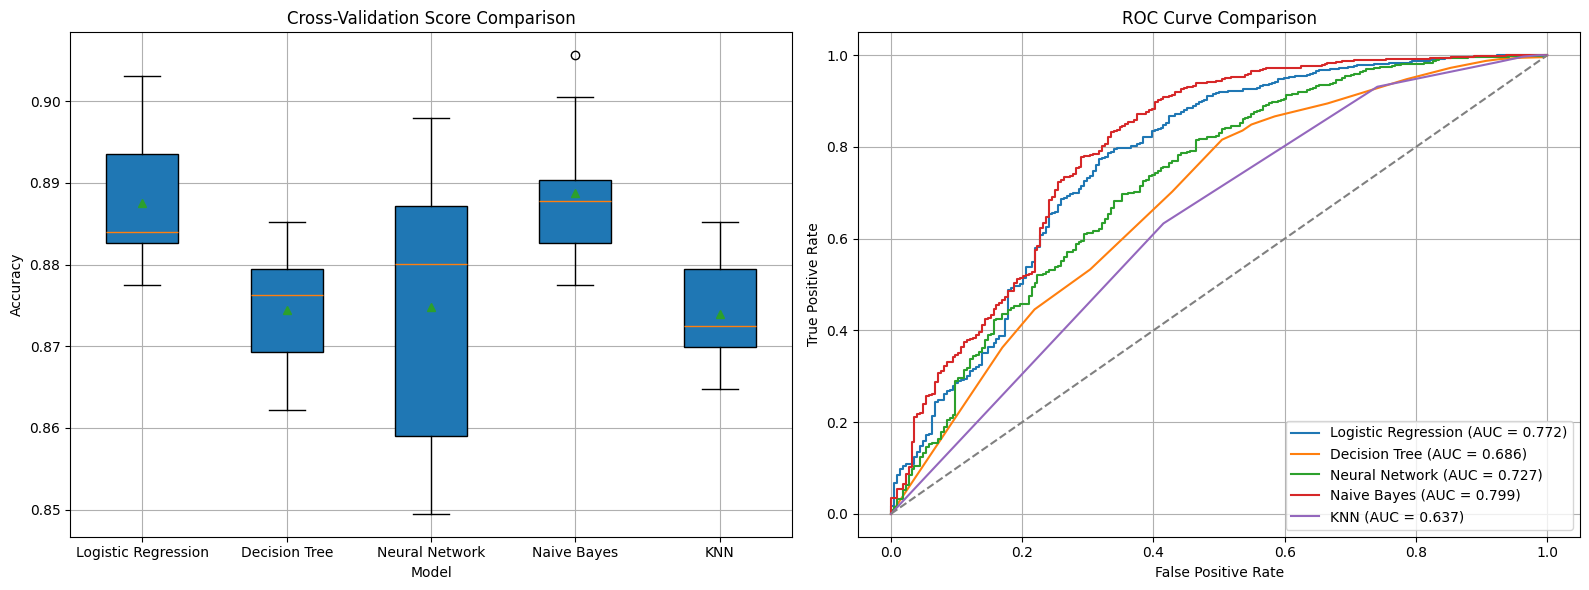

📊 Model Evaluation Summary:

                 Model  Mean CV Score  Std Dev  AUC Score
0  Logistic Regression         0.8875   0.0080     0.7717
1        Decision Tree         0.8745   0.0076     0.6865
2       Neural Network         0.8747   0.0162     0.7270
3          Naive Bayes         0.8888   0.0082     0.7989
4                  KNN         0.8740   0.0062     0.6373


In [36]:
encoder = TargetEncoder()
X_train_te = encoder.fit_transform(X_train[categorical_columns], y_train)
X_test_te = encoder.transform(X_test[categorical_columns])

X_train_final = np.hstack([X_train_scaled, X_train_te])
X_test_final = np.hstack([X_test_scaled, X_test_te])

classification_model_evaluation(X_train_final, y_train, score = 'accuracy')

# **Training sets & Model Evaluation**

**Training set w/ Only Scaled Numerical Features**

*   The model’s results on the training set with only scaled numerical data (excluding conversion and click through rates) as shown, Naive Bayes has the highest Cross validation score with a relatively low variance, and has the highest ranking on the ROC Curve & AUC score. Despite falling short in the cross validation score by 0.0018 behind logistic regression & having more variation than KNN by 0.0002. It still performances exceptionally and consistently.

The purpose of using this training set is to showcase a model result for a marketing department that was performance driven. Despite scaling and using other numerical features such as user engagement & customer history metrics, this training set doesn’t take into account the categorical features that drive brand longevity. As we can see with the roc curve, the beginning half of the results show more false positives than there were true negatives. This is possibly due to the fact that this training set was leaving out other important features in our dataset, which could potentially harm brand longevity and the trust of solely performance driven marketing teams. The next few training sets and results will showcase how a marketing department would put both performance metrics & categorical metrics to good use.

**One Hot Encoded training set**
*    The results for a training set that included both the scaled numerical features along with categorical features that were one hot encoded. As we can see, the best performing model for this training set would be the Naive Bayes model. Despite being shy of 0.0010 standard deviation score behind the Decision Tree Model it still performed very consistently with this training set. It also excelled in having the highest cross validation and AUC score. Looking at the ROC curve it’s dip in the beginning half isn’t as drastic as the first training set with only numerical scaled features. This could be due to this training set accounting for each time that categorical values are present whereas the previous one didn’t

**Target Encoded training set**
*   The results for the scaled  training set with the categorical features target encoded. Target encoding finds the probability of a user converting for each of the encoded values. For instance if the campaign type social media 4 customers converted out of 10 times that it’s shown up as a campaign type on the dataset then target encoding will give that campaign type a 0.4 probability of the target. So while the previous one hot encoding has provided categorical context for our training set, this further contextualizes the categorical features as each time that a value occurs it takes into account the rest of the times it occurs and not only in a single instance.
*   After reviewing the results of the models on the target encoded training set, the best performing model is the Naive Bayes Model. It ranked the highest in the roc auc score, has a relatively low variance & has the highest average cross validation score. Even when looking at the roc curve graph, the naive bayes curve is notably more true positive leaning than the other models and previous training sets.


---


Marketing strategies that focus exclusively on performance metrics—such as clicks, conversions, or ad spend efficiency—can unintentionally harm brand perception by neglecting the nuance behind customer behavior. One-hot encoding, while useful for preserving categorical context, treats each category as a distinct, isolated entity and doesn't consider its relationship with the outcome. In contrast, target encoding enhances model learning by mapping categorical variables based on their historical correlation with the target variable. This probabilistic representation gives our models deeper insight into how different features influence conversion, making the target-encoded, scaled dataset a more contextually rich and strategic choice—even if other training sets yielded marginally higher cross-validation scores.

Among the evaluated models, Naive Bayes consistently performed the best on both the one-hot and target-encoded training sets. This may be attributed to its ability to handle probabilistic inputs effectively, making it especially compatible with the nature of target encoding. Since Naive Bayes assumes feature independence and works well with categorical data transformed into likelihoods, it's well-suited to leverage the statistical patterns in the dataset without overfitting. Its strong AUC scores and reliable cross-validation performance suggest that, in this context, it captures the underlying customer behavior better than more complex models.


In [37]:
!jupyter nbconvert --to html '/content/Benjamin_Wong_FinalProject.ipynb'

[NbConvertApp] WARNING | pattern '/content/Benjamin_Wong_FinalProject.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer